# NACA0012 Airfoil



Import the standard stuff

In [1]:
import sys, os
import numpy as np
import pandas as pn
os.chdir('/Users/7ag/active-manifolds/code_anthony/src')
sys.path.insert(0,os.path.join(os.path.expanduser("~"),'active-manifolds/active_subspaces-master/active_subspaces/utils/'))
sys.path.insert(0,os.path.join(os.path.expanduser("~"),'active-manifolds/active_subspaces-master/active_subspaces/'))

In [2]:
from functions.plotfuncs import *
from functions.ground.base_am_fxns import *
from functions.error_mains import *

from misc import *

Process data identically to Constantine

In [3]:
df = pn.DataFrame.from_csv('/Users/7ag/active-manifolds/code_anthony/as-data-sets/NACA0012/NACA0012.txt')
data = df.as_matrix()

#nominal inputs (X) and outputs (lift and drag)
X = data[:,:18]
lift = data[:,18]
drag = data[:,19]

#gradients with respect to normalized inputs
G_lift = data[:,20:38]
G_drag = data[:,38:]


normGlift = preprocessing.normalize(G_lift)
normGdrag = preprocessing.normalize(G_drag)

#M = number of data points, m = number of input parameters
M, m = X.shape

#output labels for plots
labels = df.keys()
out_labels = labels[18:20]

#lower and upper bounds
xl = -0.01*np.ones((1, m))
xu = 0.01*np.ones((1, m))

#normalized inputs
XX = BoundedNormalizer(xl, xu).normalize(X)

## Lift Experiment

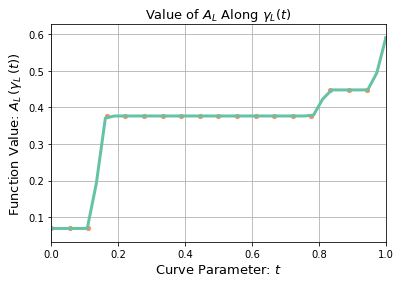

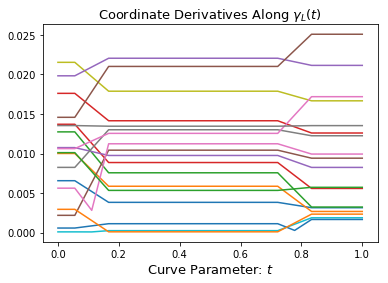

In [6]:
np.random.seed(44)
am, fVals = build_AM_from_data(np.ravel(2*np.random.rand(18,1)-1), XX, lift, normGlift, 0.05)

splinePlot(am,fVals,'A_L','L')

numpts = len(am)
sValues = np.linspace(0., numpts, numpts) / (numpts)

fig=plt.figure()
ax = fig.add_subplot(111)
ax.set_title(r'Coordinate Derivatives Along $\gamma_{L}(t)$', fontsize = 13)
ax.set_xlabel(r'Curve Parameter: $t$', fontsize = 13)
[ax.plot(sValues,np.abs(np.gradient(am[:,i]))) for i in xrange(18)]
plt.savefig('Alift_derivs.pdf')

### Lift Errors

level set for data point  [-0.3782942   0.18153267  0.53553565 -0.38129605  0.2541279  -0.14941002
  0.20538499 -0.37918872 -0.53496484  0.05828067 -0.18644654 -0.31335746
  0.76551086  0.50723713  0.41141854 -0.30164431 -0.56900312 -0.28520467],  300 of 300
The L1 Error is 0.179037
The L2 Error is 0.012540
The R^2 value of the response surface is 0.9297
The L1 Error is 0.200318
The L2 Error is 0.250042


(0.20031830794742969, 0.25004232531047355)

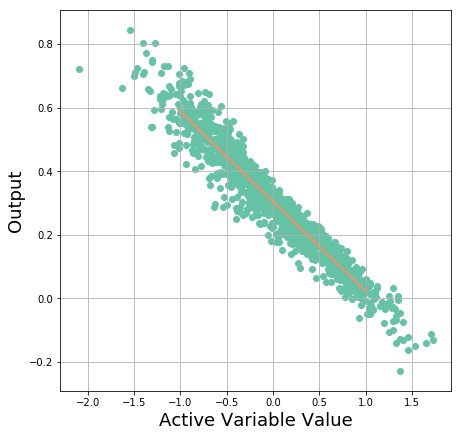

In [15]:
mainRandEx(44, 18, XX, lift, normGlift, 0.05, 1456, 'AirfoilL-AM')
SubspEx(44, XX, lift, G_lift, 1456, 'AirfoilL-AS')

## Drag Experiment

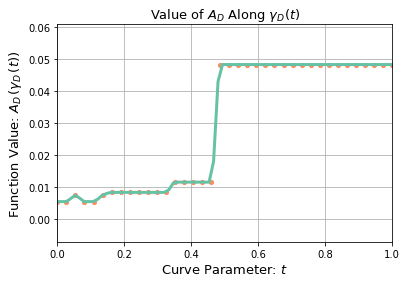

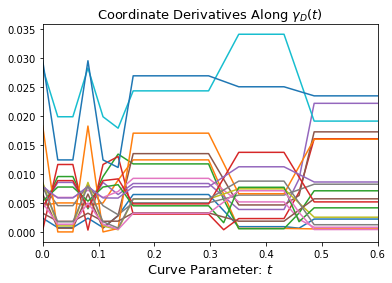

In [7]:
np.random.seed(49)
am2, fVals2 = build_AM_from_data(np.ravel(2*np.random.rand(18,1)-1), XX, drag, normGdrag, 0.05)

splinePlot(am2,fVals2, 'A_D', 'D')

numpts2 = len(am2)
sValues2 = np.linspace(0., numpts2, numpts2) / (numpts2)

fig=plt.figure()
ax = fig.add_subplot(111)
ax.set_title(r'Coordinate Derivatives Along $\gamma_{D}(t)$', fontsize = 13)
ax.set_xlabel(r'Curve Parameter: $t$', fontsize = 13)
[ax.plot(sValues2,np.abs(np.gradient(am2[:,i]))) for i in xrange(18)]
plt.xlim(0,0.6)
plt.savefig('Adrag_derivs.pdf')

### Drag Errors

level set for data point  [-0.4093135   0.65283286  0.74794701  0.8347548   0.00166298 -0.21013129
  0.05074537 -0.8940165  -0.89283338 -0.27945956  0.54227778  0.38670416
 -0.80898701 -0.98217879  0.03777546 -0.69099588 -0.40082892  0.29618474],  300 of 300
The L1 Error is 0.012064
The L2 Error is 0.000877
The R^2 value of the response surface is 0.8707
The L1 Error is 0.015848
The L2 Error is 0.019778


(0.015848330027033238, 0.019778348937526814)

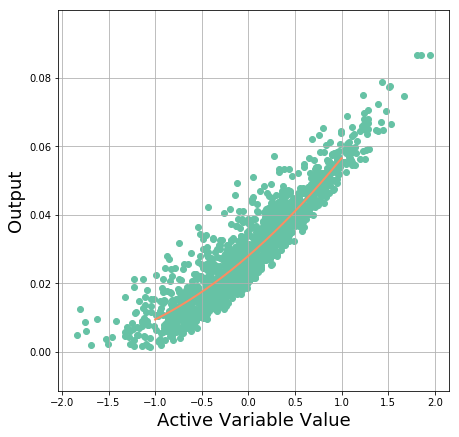

In [13]:
mainRandEx(49, 18, XX, drag, normGdrag, 0.05, 1456, 'AirfoilD-AM')
SubspEx(49, XX, drag, G_drag, 1456, 'AirfoilD-AS')